### yellowbrick kütüphanesi ile kümeleme

In [1]:
from yellowbrick.cluster import SilhouetteVisualizer

In [5]:
from sklearn.cluster import KMeans
import pandas as pd


c:\Users\ahmi_\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


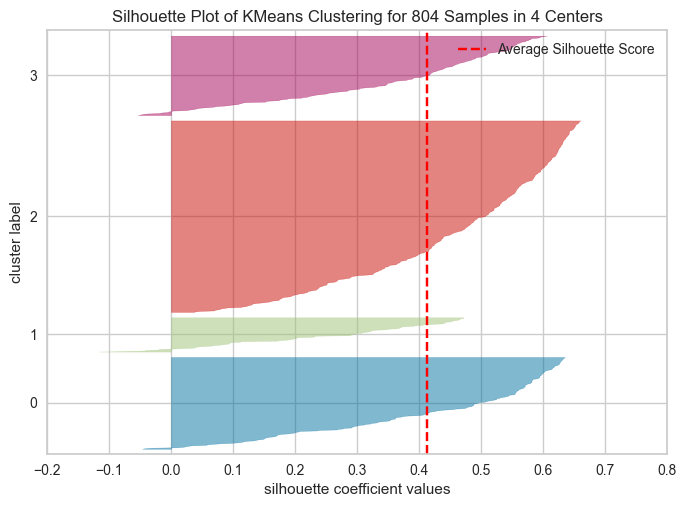

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 804 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [9]:
df = pd.read_csv('cars.csv')
X = df[['Price','Mileage', 'Cylinder']]

model =KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

In [12]:
from sklearn.metrics import silhouette_score
wcss = [] # Within-Cluster-Sum-of-Squares
import warnings
warnings.filterwarnings('ignore')
ss=[]
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    ss.append(silhouette_score(X, kmeans.predict(X)))

<Axes: >

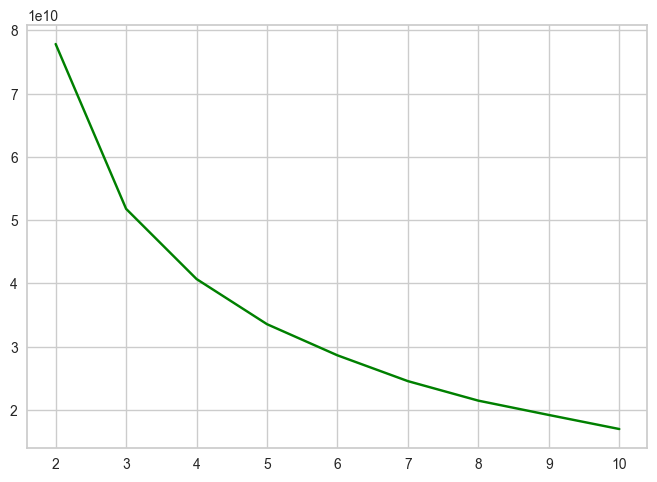

In [16]:
import seaborn as sns
sns.lineplot(x=range(2, 11), y=wcss, markers='o', color='green')

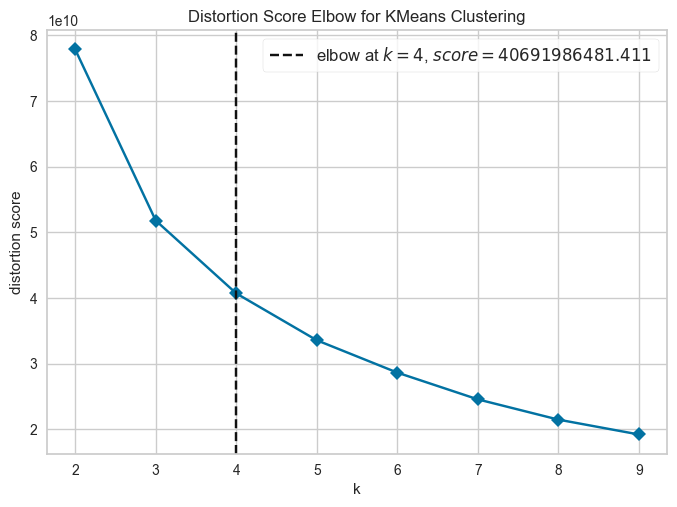

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)

visualizer.fit(X)  
visualizer.show()